# Univariate LSTM - MVO Optimized Portfolio Construction
Some helpful resources

[Multi stock prediction w single nn](https://www.kaggle.com/humamfauzi/multiple-stock-prediction-using-single-nn),
[LSTM math](https://medium.com/deep-math-machine-learning-ai/chapter-10-1-deepnlp-lstm-long-short-term-memory-networks-with-math-21477f8e4235)
## 1. Import Libraries

In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go

plt.style.use('seaborn-darkgrid')
sns.set(rc={'figure.figsize':(20,15)})
%matplotlib inline


### Gather historical values for MVO 

In [2]:
%store -r asset_11

In [6]:
asset_11.head(2)

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
Date,,,,,,,,,,,
2009-06-01,34.372078,27.405502,32.856422,75.464882,65.979172,57.978580,75.367775,79.87307,22.627659,41.031338,93.709999
2009-06-08,35.200672,27.511499,32.952915,75.637337,67.205452,57.947876,74.506866,80.43000,22.154604,42.133686,92.169998


In [7]:
asset_11.tail(2)

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
Date,,,,,,,,,,,
2019-05-20,63.412022,39.647701,110.292091,83.758156,118.688538,108.201881,111.810753,112.414261,87.221184,61.062630,121.300003
2019-05-27,62.061165,40.401951,108.001602,84.086311,119.778969,108.607094,112.178490,113.756393,86.062332,58.238411,123.330002


Use data up to 2015 to simulate a passively-held portfolio.

In [8]:
testing_period = '2015-06-01'

In [93]:
df_pre= asset_11.loc[(asset_11.index < testing_period)]

In [94]:
df_pre.tail(3)

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
Date,,,,,,,,,,,
2015-05-11,59.812038,39.406128,75.344002,80.670296,102.837875,91.522491,98.349182,104.744438,67.366898,71.018448,117.529999
2015-05-18,59.427395,39.031704,75.014374,80.575249,102.041214,91.530602,98.068756,104.540764,66.502914,70.604675,115.599998
2015-05-25,58.255978,37.552258,74.226967,80.651253,102.422211,91.133232,98.421532,104.799980,65.746918,69.011215,114.099998


In [9]:
df = asset_11.loc[(asset_11.index > testing_period)]

In [10]:
df.head(2)

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
Date,,,,,,,,,,,
2015-06-08,57.871342,36.748619,73.769173,80.486794,100.606331,89.097290,97.976440,103.189217,64.342896,67.761108,113.230003
2015-06-15,57.740211,36.584236,74.400932,80.648430,101.188171,89.715935,98.302788,104.244545,65.447838,66.819145,115.120003


In [74]:
df.tail(2)

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
Date,,,,,,,,,,,
2019-05-20,63.412022,39.647701,110.292091,83.758156,118.688538,108.201881,111.810753,112.414261,87.221184,61.062630,121.300003
2019-05-27,62.061165,40.401951,108.001602,84.086311,119.778969,108.607094,112.178490,113.756393,86.062332,58.238411,123.330002


### Efficacy of Portfolio Theory
Calculate realized log returns, std, covariance, correlations for all assets' observations.
Construction and method follows [Bradford Lynch's blog post](http://www.bradfordlynch.com/blog/2015/12/04/InvestmentPortfolioOptimization.html) and [this](https://github.com/tthustla/efficient_frontier/blob/master/Efficient%20_Frontier_implementation.ipynb).
* Math of MPT https://docs.mosek.com/9.0/pythonfusion/case-studies-portfolio.html

#### Mean 
#### Mean of return (of single asset) = expected return r over n observations
Take the log of the weighted-average of individual asset return 
\begin{equation*}
Mean(returns) = \frac{1}{n}\sum_{i=1}^n r_i
\end{equation*}

#### Variance (aka. Volatility)
Measures how volatile the return of each asset is individually.
\begin{equation*}
Var(returns) = \sum_{i=1}^n (r_i - μ)^2
\end{equation*}

#### Annualize
To annualize weekly data, k = sqrt(52) is used.

#### Monte-Carlo simulation on weights
"" To see all the possible combinations of 4 asset weights. With each random set of weights, our simulation will calculate a new annual return and standard deviation for the portfolio.

Start by making 2 empty lists called 'portfolio returns (pf_ret)' and 'portfolio volatilities (pf_vol)'. These will capture all simulation calculations of the for function beneath it.

Then add in my random weights generator code from earlier and have 1000 interations of random weights plug into our portfolio return and portfolio volatility formulas. The append method is what creates a new entry to the list with each interation. ""
#### Portfolio mean variance calculations
\begin{equation*}
Mean(Portfolio Returns) = \sum_{i=1}^n (w_ir_i)
\end{equation*}

\begin{equation*}
Std(Portfolio Returns) = \sum_{i=1}^n \sum_{j=1}^n w_iw_jρ_i,_jσ_iσ_j = \mathbf{w^T⋅(cov⋅w)}
\end{equation*}


### Data visualization

In [95]:
# how assets correlate with one another
df_pre.corr()

,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
IVV,1.000000,0.628760,0.933697,0.712238,0.782025,0.753671,0.692158,0.528898,0.853169,0.917523,-0.164240
EFA,0.628760,1.000000,0.495682,0.534188,0.487837,0.552680,0.391004,0.432454,0.555363,0.634574,0.297249
EEM,0.933697,0.495682,1.000000,0.852689,0.921244,0.876913,0.868527,0.710190,0.961740,0.914528,-0.042923
VIG,0.712238,0.534188,0.852689,1.000000,0.953008,0.941574,0.916206,0.920897,0.918916,0.824450,0.428834
SHY,0.782025,0.487837,0.921244,0.953008,1.000000,0.984872,0.977981,0.911607,0.966915,0.848577,0.269839
LQD,0.753671,0.552680,0.876913,0.941574,0.984872,1.000000,0.962222,0.933007,0.939721,0.836685,0.344222
EMB,0.692158,0.391004,0.868527,0.916206,0.977981,0.962222,1.000000,0.915461,0.927494,0.768730,0.283636
MUB,0.528898,0.432454,0.710190,0.920897,0.911607,0.933007,0.915461,1.000000,0.817535,0.714955,0.602524
TIP,0.853169,0.555363,0.961740,0.918916,0.966915,0.939721,0.927494,0.817535,1.000000,0.870819,0.140109
VNQ,0.917523,0.634574,0.914528,0.824450,0.848577,0.836685,0.768730,0.714955,0.870819,1.000000,0.126781


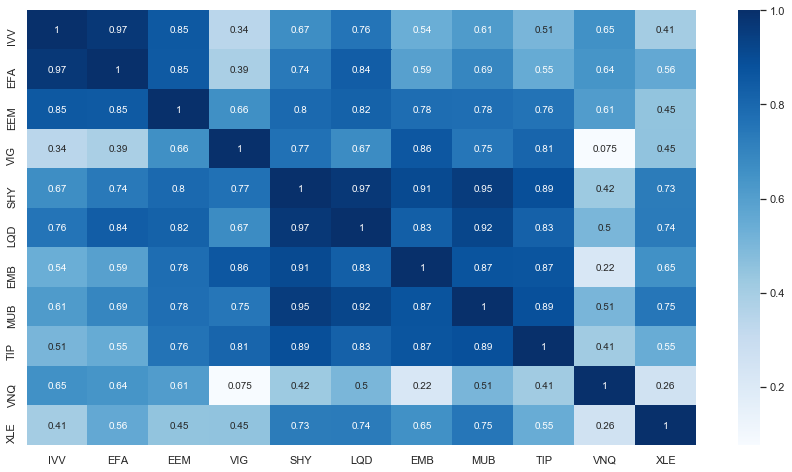

In [96]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True, cmap="Blues" )


## Realized MVO

In [13]:
def portfolio_performance_annualized(weights, weighted_avg_ret, cov_matrix):
    returns_actual = np.sum(weighted_avg_ret*weights ) *52
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(52)
    return std, returns_actual

In [14]:
def random_portfolios(runs, weighted_avg_ret, cov_matrix, rf):
    results = np.zeros((3,runs))
    weights_record = []
    for i in range(runs):
        weights = np.random.random(11)
        weights /= np.sum(weights)
        weights_record.append(weights)
        portfolio_std_dev, portfolio_return = portfolio_performance_annualized(weights, weighted_avg_ret, cov_matrix)
        results[0,i] = portfolio_std_dev
        results[1,i] = portfolio_return
        results[2,i] = (portfolio_return - rf) / portfolio_std_dev
    return results, weights_record

In [15]:
returns_actual = df.pct_change()
weighted_avg_ret = returns_actual.mean()
cov_matrix = returns_actual.cov()
runs = 50000
rf = 0.01

In [41]:
def simulated_pf(weighted_avg_ret, cov_matrix, runs, rf):
    results, weights = random_portfolios(runs,weighted_avg_ret, cov_matrix, rf)
    
    max_sharpe_idx = np.argmax(results[2])
    sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
    max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df_pre.columns,columns=['allocation'])
    max_sharpe_allocation.allocation = [round(i,3)for i in max_sharpe_allocation.allocation]
    max_sharpe_allocation = max_sharpe_allocation.T
    
    min_vol_idx = np.argmin(results[0])
    sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
    
    print ("-"*80)
    print ("Optimal Sharpe Ratio Portfolio Allocation\n")
    print (max_sharpe_allocation)

    plt.figure(figsize=(10, 8))
    plt.scatter(results[0,:],results[1,:],c=results[2,:],cmap='plasma', marker='o', s=10, alpha=0.3)
    plt.colorbar()
    plt.scatter(sdp,rp,marker='*',color='r',s=500, label='Maximum Sharpe ratio')
    plt.scatter(sdp_min,rp_min,marker='*',color='g',s=500, label='Minimum volatility')
    plt.title('Simulated Portfolio Optimization based on Efficient Frontier')
    plt.xlabel('annualized volatility')
    plt.ylabel('annualized returns')
    plt.legend(labelspacing=0.8)
    return max_sharpe_allocation


In [97]:
def simulated_pf_weights_only(weighted_avg_ret, cov_matrix, runs, rf):
    for i in range (9): 
        results, weights = random_portfolios(runs,weighted_avg_ret, cov_matrix, rf)

        max_sharpe_idx = np.argmax(results[2])
        sdp, rp = results[0,max_sharpe_idx], results[1,max_sharpe_idx]
        max_sharpe_allocation = pd.DataFrame(weights[max_sharpe_idx],index=df_pre.columns,columns=['allocation'])
        max_sharpe_allocation.allocation = [round(i,3)for i in max_sharpe_allocation.allocation]
        max_sharpe_allocation = max_sharpe_allocation.T
        
        min_vol_idx = np.argmin(results[0])
        sdp_min, rp_min = results[0,min_vol_idx], results[1,min_vol_idx]
        
        print('-'*80)
        print('Optimal Sharpe Ratio Portfolio Allocation')
        print(max_sharpe_allocation)

--------------------------------------------------------------------------------
Optimal Sharpe Ratio Portfolio Allocation

              IVV    EFA    EEM    VIG   SHY    LQD    EMB    MUB    TIP  \
allocation  0.003  0.005  0.145  0.153  0.17  0.117  0.168  0.161  0.056   

              VNQ    XLE  
allocation  0.011  0.011  


,IVV,EFA,EEM,VIG,SHY,LQD,EMB,MUB,TIP,VNQ,XLE
allocation,0.003,0.005,0.145,0.153,0.17,0.117,0.168,0.161,0.056,0.011,0.011


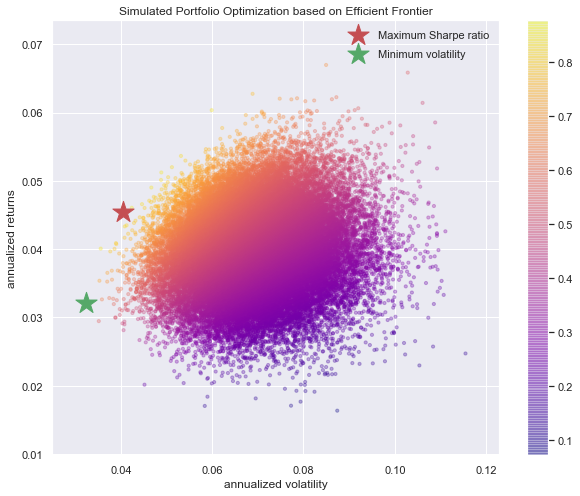

In [98]:
simulated_pf(weighted_avg_ret, cov_matrix, runs, rf)

In [99]:
def portfolio_breakdown(weights_array):
    exp_ret = np.sum((weekly_returns.mean()*weights_array)*52)
    print('Expected returns %:')
    print(exp_ret*100)
    exp_std = np.sqrt(np.dot(weights_array,np.dot(weekly_returns.cov()*52,weights_array)))
    print('Std:')
    print(exp_std)
    sharpe_ratio = (exp_ret-rf)/exp_std
    print('Sharpe:')
    print(sharpe_ratio)

In [100]:
weekly_returns = df.pct_change().dropna()

In [101]:
weights1 = (0.008,0.016,0.204,0.202,0.192,0.043,0.156,0.073,0.053,0.0,0.051)

In [102]:
portfolio_breakdown(weights1)

Expected returns %:
4.837006944499445
Std:
0.04315451236529162
Sharpe:
0.8891322677962822


In [103]:
simulated_pf_weights_only(weighted_avg_ret, cov_matrix, runs, rf)

--------------------------------------------------------------------------------
Optimal Sharpe Ratio Portfolio Allocation
              IVV    EFA    EEM   VIG    SHY    LQD    EMB    MUB    TIP  \
allocation  0.023  0.006  0.166  0.09  0.218  0.082  0.231  0.094  0.028   

              VNQ    XLE  
allocation  0.004  0.059  
--------------------------------------------------------------------------------
Optimal Sharpe Ratio Portfolio Allocation
              IVV    EFA    EEM   VIG    SHY    LQD    EMB    MUB    TIP  \
allocation  0.034  0.003  0.251  0.03  0.211  0.121  0.233  0.039  0.022   

              VNQ    XLE  
allocation  0.015  0.042  
--------------------------------------------------------------------------------
Optimal Sharpe Ratio Portfolio Allocation
              IVV    EFA    EEM    VIG    SHY    LQD    EMB    MUB    TIP  \
allocation  0.033  0.009  0.196  0.187  0.144  0.082  0.201  0.061  0.007   

              VNQ    XLE  
allocation  0.003  0.077  
--------

In [104]:
weights2 = np.array([0.023,0.006,0.166,0.09,0.218,0.082,0.231,0.094,0.028,0.004,0.059])
weights3 = np.array([0.034,0.003,0.251,0.03,0.211,0.121,0.233,0.039,0.022,0.015,0.042])
weights4 = np.array([0.033,0.009,0.196,0.187,0.144,0.082,0.201,0.061,0.007,0.003,0.077])
weights5 = np.array([0.008,0.023,0.161,0.154,0.152,0.177,0.163,0.128,0.013,0.007,0.014])
weights6 = np.array([0.004,0.008,0.193,0.048,0.095,0.198,0.199,0.066,0.057,0.002,0.131])
weights7 = np.array([0.011,0.003,0.112,0.254,0.316,0.052,0.135,0.036,0.047,0.016,0.017])
weights8 = np.array([0.005,0.001,0.245,0.16,0.19,0.189,0.119,0.001,0.023,0.008,0.06])
weights9 = np.array([0.001,0.004,0.191,0.2,0.156,0.007,0.237,0.01,0.037,0.012,0.145])
weights10 = np.array([0.024,0.004,0.161,0.173,0.185,0.084,0.252,0.075,0.025,0.004,0.012])

In [105]:
portfolio_breakdown(weights2)

Expected returns %:
4.752608683286235
Std:
0.04132283692369402
Sharpe:
0.9081198104127585


In [106]:
portfolio_breakdown(weights3)

Expected returns %:
5.505194601928816
Std:
0.05070938917170464
Sharpe:
0.8884340110416222


In [107]:
portfolio_breakdown(weights4)

Expected returns %:
4.568542039673776
Std:
0.04079960370107114
Sharpe:
0.8746511524522697


In [108]:
portfolio_breakdown(weights5)

Expected returns %:
4.5866520355106335
Std:
0.04158494634741153
Sharpe:
0.8624880757442377


In [109]:
portfolio_breakdown(weights6)

Expected returns %:
5.267420442332514
Std:
0.04988729822398525
Sharpe:
0.8554122179903474


In [110]:
portfolio_breakdown(weights7)

Expected returns %:
4.15203985015396
Std:
0.036215164386670655
Sharpe:
0.8703646396574412


In [111]:
portfolio_breakdown(weights8)

Expected returns %:
5.34053756451467
Std:
0.047984012250926404
Sharpe:
0.9045799550517722


In [112]:
portfolio_breakdown(weights9)

Expected returns %:
4.515989211248233
Std:
0.04064779169883861
Sharpe:
0.8649889856989925


In [113]:
portfolio_breakdown(weights10)

Expected returns %:
4.510743115434889
Std:
0.037569780227968
Sharpe:
0.9344593165390392
